In [73]:
from bs4 import BeautifulSoup
import requests
import spacy
from spacy.matcher import Matcher
import re
from collections import Counter
from gensim import corpora



nlp = spacy.load('en_core_web_sm')

In [74]:
url = 'https://imn.ie/ireland-could-be-a-leader-in-clinical-trials-expert-claims/'
req = requests.get(url)

In [75]:
html = req.text

In [76]:
soup = BeautifulSoup(html,'html.parser')

In [77]:
text = soup.findAll('p')



In [94]:
# putting the text of each "p tag" into "paragraphs" list
paragraphs = []
for x in text:
    paragraphs.append(str(x.text))
# puting all alphanumerics from each paragraphs into "clean" list  
clean = []
for w in paragraphs[:]:
    clean.append(re.findall(r'\W',w))
# joining all alphanumerics from "clean" into "joined"
joined = []
for alpha in clean:
    # convert each item in the list to a string, and then join them
    joined.append(' '.join(map(str, alpha)))
alljoined = ''.join(joined)
# removing all emty spaces from the "alljoined" string
print("Emty spaces removed and joined from 'clean' list: " + "\n\n" + alljoined.replace(" ","") + "\n")

# cleaning each paragraphs with the "clean" list
cleared = []
for item in paragraphs[:]:
    for c in alljoined.replace(" ",""):
        if c in item:
            item = item.replace(c, "")
    cleared.append(item) 
    
# clearing out empty items from the "cleared" list
none_spaces = [item for item in cleared if item != '' and item !=' ']
# removing unnecessary paragraphs
none_spaces.pop(9)
none_spaces.pop(8)
none_spaces.pop(7)

print("Final result: \n\n " + str(none_spaces))


      

Emty spaces removed and joined from 'clean' list: 

,()[].,, ,“,”..,..,,,.“,”.“,”.,(),,, .,, ’().’’-,. 
*



,,.

©.||||

Final result: 

 ['Ireland can have a lead role for clinical trials in Europe the Irish Pharmaceutical Healthcare Association IPHA told a conference today Monday ahead of International Clinical Trials Week', 'Speaking at an event hosted in the Mansion House Dublin Dr Itziar Canamasassaid All of the key stakeholders including industry must actively collaborative together to realise our shared ambition to make Ireland a leading location for clinical trials', 'The results of an IPHA survey presented today show that it takes an average of eight months to recruit the first patient into a clinical trial in Ireland That figure is based on 90 trials set up between 2013 and 2018 spanning 11 therapy areas and all four phases of the clinical development process The measure is based on the number of calendar days required to recruit the initial patient from the date the company

In [33]:
document = ''
for t in none_spaces:
    document += t.lower()
   


In [34]:
doc =nlp(document)
nlp.Defaults.stop_words.add('the')
nlp.Defaults.stop_words.add('by')
nlp.Defaults.stop_words.add('that')
nlp.Defaults.stop_words.add('That')
nlp.Defaults.stop_words.add('The')
nlp.Defaults.stop_words.add('All')

In [110]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from collections import defaultdict
from gensim import models
from gensim.utils import lemmatize


paragraph_list = []
# Removing stopwords from "none_spaces" list into "paragraph_list".
for tx in none_spaces:
    clear_stop_words = remove_stopwords(tx.lower())
    token_paragraph =  nlp(clear_stop_words)
    text = []
    for token in token_paragraph:
        text.append(token.lemma_)
    paragraph_list.append(text)
    
frequency = defaultdict(int)
for text in paragraph_list:
    for token in text:
        frequency[token] += 1

processed_corpus = [[token for token in text if frequency[token] > 1] for text in paragraph_list]

print(processed_corpus)
    
     
    


[['ireland', 'lead', 'role', 'clinical', 'trial', 'europe', 'irish', 'pharmaceutical', 'healthcare', 'ipha', 'today', 'international', 'clinical', 'trial'], ['dr', 'share', 'ireland', 'lead', 'clinical', 'trial'], ['ipha', 'today', 'month', 'recruit', 'patient', 'clinical', 'trial', 'ireland', 'base', 'trial', 'clinical', 'process', 'base', 'recruit', 'patient', 'company', 'country', 'month', 'process'], ['ireland', 'lead', 'role', 'clinical', 'trial', 'europe', 'dr', 'base', 'international', 'pharmaceutical', 'company', 'healthcare', 'clinical', 'trial'], ['ipha', 'clinical', 'trial', 'hospital', 'company', 'research', 'hospital', 'clinical', 'trial'], ['ipha', 'clinical', 'trial', 'recruit', 'patient', 'clinical', 'research', 'ecrin'], ['ipha', 'share', 'ireland', 'ecrin', 'ireland', 'country', 'role', 'clinical', 'trial', 'irish', 'patient']]


In [111]:
# creating the dictionary for further use
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary.token2id)

{'clinical': 0, 'europe': 1, 'healthcare': 2, 'international': 3, 'ipha': 4, 'ireland': 5, 'irish': 6, 'lead': 7, 'pharmaceutical': 8, 'role': 9, 'today': 10, 'trial': 11, 'dr': 12, 'share': 13, 'base': 14, 'company': 15, 'country': 16, 'month': 17, 'patient': 18, 'process': 19, 'recruit': 20, 'hospital': 21, 'research': 22, 'ecrin': 23}


In [112]:
# bow = bags of words
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]


In [113]:
# Calculating  words frequency
# tfidf = Term Frequency Inverse Document Frequency
tfidf = models.TfidfModel(bow_corpus)


# split the document string
words = document.split()


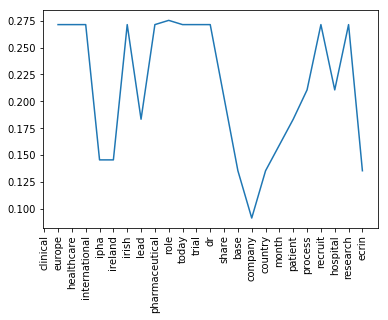

In [115]:
import matplotlib.pyplot as plt
tfidf_weighing = tfidf[dictionary.doc2bow(words)]
#zipped_list =list(zip(*testList2))

#creating parameters for the plot model
x_values = []
y_values = []
for item in tfidf_weighing[:]:
    value = list(item)
    x_values.append(value[0])
    y_values.append(value[1])
plot_topics = [] 
# creating the labels for axis [clinical, healthcare...]
for k in dictionary.token2id:
    plot_topics.append(k)
# designing the plot    
plt.xticks(range(24), plot_topics ,rotation='vertical')
plt.plot(x_values,y_values)
plt.show()


In [119]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary,  num_topics=5)
print(lda_model.show_topics())

[(0, '0.043*"clinical" + 0.042*"trial" + 0.042*"ireland" + 0.042*"ipha" + 0.042*"lead" + 0.042*"dr" + 0.042*"base" + 0.042*"ecrin" + 0.042*"research" + 0.042*"role"'), (1, '0.147*"ireland" + 0.101*"trial" + 0.101*"clinical" + 0.101*"share" + 0.055*"ipha" + 0.055*"patient" + 0.055*"country" + 0.055*"role" + 0.055*"irish" + 0.055*"ecrin"'), (2, '0.094*"month" + 0.092*"trial" + 0.091*"recruit" + 0.090*"process" + 0.086*"patient" + 0.079*"base" + 0.065*"clinical" + 0.057*"ireland" + 0.051*"ipha" + 0.050*"country"'), (3, '0.128*"clinical" + 0.128*"trial" + 0.067*"ireland" + 0.067*"healthcare" + 0.067*"role" + 0.067*"lead" + 0.067*"europe" + 0.067*"international" + 0.067*"pharmaceutical" + 0.037*"ipha"'), (4, '0.182*"clinical" + 0.133*"trial" + 0.088*"ipha" + 0.075*"research" + 0.075*"hospital" + 0.068*"patient" + 0.066*"recruit" + 0.055*"company" + 0.041*"ecrin" + 0.038*"base"')]


In [120]:
# Calculating the efficiency for the LDA model with c_v measure
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.3175770532327247
